In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
import os

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)
# 예시 레이블, 실제 데이터에 맞게 수정하세요
# anger, disgust, fear, joy, neutral, sadness, surprise
num_samples = len(data)
# 0: anger, 1: disgust, 2: fear, 3: joy, 4: neutral, 5: sadness, 6: surprise 
labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54

Length of data (audio features): 450
Length of labels: 450


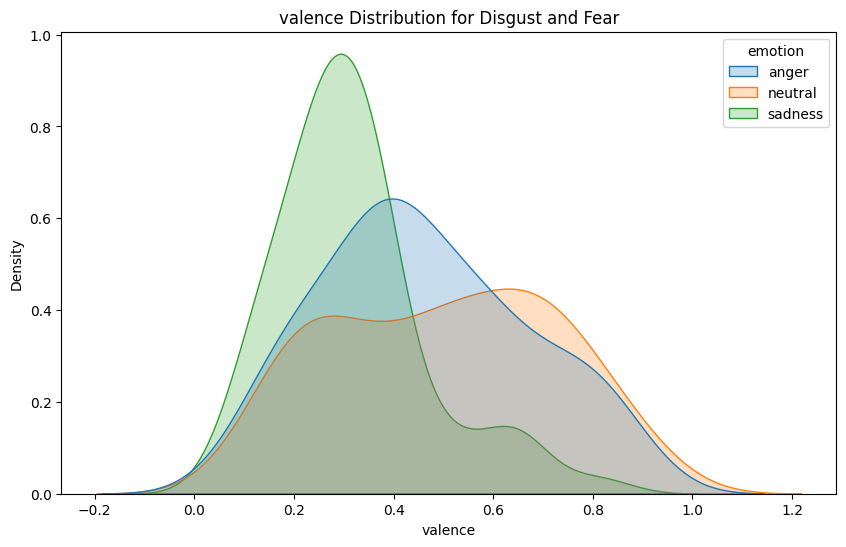

In [58]:
import torch
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 데이터와 레이블 길이 확인
print(f"Length of data (audio features): {len(data)}")
print(f"Length of labels: {len(labels)}")

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)

labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54
# 2. 길이 맞추기: 필요시 레이블 배열 잘라내기
if len(data) == len(labels):
    print("Lengths match. Proceeding with DataFrame creation.")
else:
    print("Warning: Lengths do not match. Adjusting the size of labels.")
    labels = labels[:len(data)]  # 데이터 길이에 맞게 레이블을 자르기

# emotion 레이블 추가
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]  # 7개의 감정 레이블 리스트

# 오디오 피처와 감정 레이블을 DataFrame으로 변환
audio_features_df = pd.DataFrame(data, columns=['tempo', 'valence', 'energy', 'danceability', 'acousticness', 'speechiness', 'liveness'])
audio_features_df['emotion'] = [emotion_labels[label] for label in labels]  # labels 배열을 이용하여 감정 레이블 추가

# 2. 시각화하고 싶은 감정 선택 (disgust와 fear만 선택)
emotions_to_visualize = ["neutral", "sadness", "anger"]

# 선택한 감정에 해당하는 데이터만 필터링
filtered_df = audio_features_df[audio_features_df['emotion'].isin(emotions_to_visualize)]

# 3. 시각화: valence에 대한 감정 분포 (disgust와 fear)
feature='valence'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x=feature, hue='emotion', fill=True)  # 선택한 감정별 valence 분포
plt.title(f'{feature} Distribution for Disgust and Fear')
plt.show()

In [19]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 경로

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 2. 피처 스케일링 (정규화)
scaler = MinMaxScaler()  # 0과 1 사이로 모든 피처를 정규화
normalized_data = scaler.fit_transform(data)

# 3. 레이블 설정
# 예시로 감정 레이블을 정의함 (실제 데이터에 맞게 수정)
labels = np.array([0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54)

# 4. 커스텀 데이터셋 정의
class AudioFeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 5. 데이터셋 및 DataLoader 생성
dataset = AudioFeatureDataset(normalized_data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 6. 간단한 신경망 모델 정의 (여기서 MLP 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 7. 모델 초기화 및 학습 설정
input_size = normalized_data.shape[1]  # 피처 개수
hidden_size = 64  # 은닉층의 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 모델 학습
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training completed.")

# 9. 모델 저장
model_save_path = 'audio_emotion_classifier.pth'  # 모델을 저장할 경로
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# 10. 저장된 모델 불러오기 (필요할 때)
loaded_model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()  # 모델을 평가 모드로 전환
print("Model loaded and ready for inference.")


Epoch [1/100], Loss: 1.9167
Epoch [2/100], Loss: 1.8823
Epoch [3/100], Loss: 1.8568
Epoch [4/100], Loss: 1.8422
Epoch [5/100], Loss: 1.8385
Epoch [6/100], Loss: 1.7731
Epoch [7/100], Loss: 1.7545
Epoch [8/100], Loss: 1.7095
Epoch [9/100], Loss: 1.7340
Epoch [10/100], Loss: 1.6924
Epoch [11/100], Loss: 1.6802
Epoch [12/100], Loss: 1.7192
Epoch [13/100], Loss: 1.6873
Epoch [14/100], Loss: 1.6194
Epoch [15/100], Loss: 1.6253
Epoch [16/100], Loss: 1.5971
Epoch [17/100], Loss: 1.5873
Epoch [18/100], Loss: 1.5765
Epoch [19/100], Loss: 1.5811
Epoch [20/100], Loss: 1.5450
Epoch [21/100], Loss: 1.5412
Epoch [22/100], Loss: 1.5549
Epoch [23/100], Loss: 1.5799
Epoch [24/100], Loss: 1.5309
Epoch [25/100], Loss: 1.5453
Epoch [26/100], Loss: 1.5008
Epoch [27/100], Loss: 1.5510
Epoch [28/100], Loss: 1.4869
Epoch [29/100], Loss: 1.4998
Epoch [30/100], Loss: 1.5051
Epoch [31/100], Loss: 1.5297
Epoch [32/100], Loss: 1.4927
Epoch [33/100], Loss: 1.4873
Epoch [34/100], Loss: 1.5046
Epoch [35/100], Loss: 1

# 생성한 모델 써보기. 아무 플레이리스트나 넣어보시오

In [24]:
import torch
import torch.nn as nn
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from sklearn.preprocessing import MinMaxScaler

# Spotify API 인증 설정
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="0f9a6c744c494cba948ec67949d9158c",       # Spotify에서 발급받은 Client ID
    client_secret="bdaffd4b3d514ee48aae9842ecffa0cf" # Spotify에서 발급받은 Client Secret
))

# 플레이리스트 ID를 통해 트랙 ID 가져오는 함수
def get_playlist_track_ids(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_ids = []
    
    # 플레이리스트 내 모든 트랙의 ID를 track_ids 리스트에 추가
    for item in tracks:
        track = item['track']
        track_ids.append(track['id'])
    
    return track_ids

# 필요한 오디오 피쳐를 가져오는 함수
def get_selected_audio_features(track_id):
    features = sp.audio_features(track_id)
    if features and features[0]:  # features[0]이 None이 아닌 경우
        audio_features = features[0]
        # 7가지 피쳐를 리스트 형태로 추출
        selected_features = [
            audio_features['tempo'],
            audio_features['valence'],
            audio_features['energy'],
            audio_features['danceability'],
            audio_features['acousticness'],
            audio_features['speechiness'],
            audio_features['liveness']
        ]
        return selected_features
    return None

# 트랙 ID를 통해 노래 제목 가져오기
def get_track_name(track_id):
    track_info = sp.track(track_id)
    if track_info:
        return track_info['name']
    return None

# 여러 트랙에 대해 오디오 피처를 가져와 new_audio_features에 저장
def process_tracks_for_prediction(track_ids):
    all_features = []
    track_names = []
    
    for track_id in track_ids:
        try:
            track_name = get_track_name(track_id)
            if not track_name:
                print(f"트랙 이름을 가져올 수 없습니다: {track_id}")
                continue
            
            selected_features = get_selected_audio_features(track_id)
            if selected_features:
                print(f"트랙 {track_name}의 오디오 피쳐가 업데이트되었습니다.")
                all_features.append(selected_features)  # 각 트랙의 피처 추가
                track_names.append(track_name)  # 트랙 이름 저장
            else:
                print(f"해당 트랙에 대한 오디오 피쳐를 가져올 수 없습니다: {track_name} ({track_id})")
        except Exception as e:
            print(f"오류 발생: {e} (트랙 ID: {track_id})")
    
    return np.array(all_features), track_names  # 여러 트랙의 피처와 이름 반환

# 예시 플레이리스트 ID
playlist_id = '4YAELvjcWBHcyTgxHaWdvL'

# 플레이리스트에 담긴 트랙 ID 가져오기
track_ids = get_playlist_track_ids(playlist_id)

# 100개 트랙의 오디오 피처 가져오기
new_audio_features, track_names = process_tracks_for_prediction(track_ids)

# 1. 스케일러 초기화 및 학습
scaler = MinMaxScaler()
scaler.fit(new_audio_features)

# 2. 학습된 스케일러를 사용해 데이터를 정규화
normalized_audio_features = scaler.transform(new_audio_features)

# 모델 불러오기
input_size = normalized_audio_features.shape[1]
hidden_size = 64  # 은닉층 크기
num_classes = 7  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load('audio_emotion_classifier.pth'))
model.eval()

# 각 노래에 대해 감정 예측
for i, features in enumerate(normalized_audio_features):
    new_audio_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # 1차원 배열을 배치로 변환
    prediction = model(new_audio_tensor)
    predicted_label = torch.argmax(prediction).item()
    
    print(f"Track: {track_names[i]}, Predicted Emotion Label: {predicted_label}")


트랙 Spicy의 오디오 피쳐가 업데이트되었습니다.
트랙 Queencard의 오디오 피쳐가 업데이트되었습니다.
트랙 I AM의 오디오 피쳐가 업데이트되었습니다.
트랙 UNFORGIVEN (feat. Nile Rodgers)의 오디오 피쳐가 업데이트되었습니다.
트랙 Kitsch의 오디오 피쳐가 업데이트되었습니다.
트랙 Super의 오디오 피쳐가 업데이트되었습니다.
트랙 FLOWER의 오디오 피쳐가 업데이트되었습니다.
트랙 With you의 오디오 피쳐가 업데이트되었습니다.
트랙 Hype Boy의 오디오 피쳐가 업데이트되었습니다.
트랙 Ditto의 오디오 피쳐가 업데이트되었습니다.
트랙 Love Always Run Away의 오디오 피쳐가 업데이트되었습니다.
트랙 Fighting (Feat. Lee Young Ji)의 오디오 피쳐가 업데이트되었습니다.
트랙 Cupid의 오디오 피쳐가 업데이트되었습니다.
트랙 Let's Say Goodbye의 오디오 피쳐가 업데이트되었습니다.
트랙 Allergy의 오디오 피쳐가 업데이트되었습니다.
트랙 OMG의 오디오 피쳐가 업데이트되었습니다.
트랙 Teddy Bear의 오디오 피쳐가 업데이트되었습니다.
트랙 Event Horizon의 오디오 피쳐가 업데이트되었습니다.
트랙 Our Blues, Our Life의 오디오 피쳐가 업데이트되었습니다.
트랙 Love..What is it의 오디오 피쳐가 업데이트되었습니다.
트랙 Heaven(2023)의 오디오 피쳐가 업데이트되었습니다.
트랙 If We Ever Meet Again의 오디오 피쳐가 업데이트되었습니다.
트랙 I Don’t Think That I Like Her의 오디오 피쳐가 업데이트되었습니다.
트랙 Dangerously의 오디오 피쳐가 업데이트되었습니다.
트랙 Don't say Goodbye의 오디오 피쳐가 업데이트되었습니다.
트랙 After LIKE의 오디오 피쳐가 업데이트되었습니다.
트랙 Thirsty의 오디오 피쳐가 업데이트되었습니다.
트랙 Heart의 오디오 피쳐가 업